In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
import math
import time

In [2]:
!pip install keras
!pip install tensorflow
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
testing_image_array = img_to_array(load_img('./train/10014_left.jpeg'))

def split_exact(z, top_bottom=False):
    if top_bottom:
        x, y = (z/2, z/2)
    else:
        x, y = z
    if (x%1 == 0.5) & (y%1 == 0.5):
        return(math.floor(x), math.ceil(y))
    else:
        return(math.floor(x+0.5), math.floor(y+0.5))

#z = (0.5, 0.5)
z = 1
start = time.time()
x, y = split_exact(z, top_bottom=True)
end = time.time()
print(np.abs(end - start))

def counting(image):
    count_l = 0
    count_r = 0
    mid_point_vert = round(image.shape[0]/2)

    for val_idx in range(round(image.shape[1]/2)):
        if sum(image[mid_point_vert][val_idx]) < 30:
            count_l += 1
        else:
            break

    #Right to left
    for val_idx in reversed(range(round(image.shape[1]/2), round(image.shape[1]) )):
        if sum(image[mid_point_vert][val_idx]) < 30:
            count_r += 1
        else:
            break

    return (count_l, count_r)

start = time.time()
l, r = counting(testing_image_array)
end = time.time()
print(np.abs(end - start))


def adjust_img_array(image_array, l=0, r=0):
    if r == 0:
        r = -(image_array.shape[1])
    return image_array[:,l:-r,:]

abc = np.array([ np.array([ np.array([0.,150.,255.,], dtype="float32") for j in range(100) ], dtype="float32") for i in range(100)], dtype="float32")
start = time.time()
abc = adjust_img_array(abc, l=50, r=20)
end = time.time()
print(np.abs(end - start))

def add_t_b_img_array(image, t=0, b=0):
    w = image.shape[1]
    new_img = [[np.array([0.,0.,0.])] * w] * t
    new_img.extend(image)
    new_img.extend([[np.array([0.,0.,0.])] * w] * b)
    return np.array(new_img, dtype="float32")

start = time.time()
display_img = add_t_b_img_array(abc, 50, 200)
end = time.time()
print(np.abs(end - start))
display(array_to_img(display_img))

def fix_image_array(image):
    #First step: get width and height:
    height, width, rgb = image.shape
    #Second step: get L and R, and their respective ratios
    left, right = counting(image)
    #Third step: calculate eye width
    eye_width = width - left - right
    #Fourth step: Identify correct scenario
    if eye_width < height:
        #Calculate the difference between height and width
        diff = height - eye_width
        #Apply l and r ratios to the diff
        l_ratio = left/(left+right)
        r_ratio = right/(left+right)
        diff_l, diff_r = split_exact( (l_ratio*diff,r_ratio*diff) )
        image = adjust_img_array(image, l=left-diff_l, r=right-diff_r)
    elif eye_width > height:
        #Eye width greater than height means we should remove L and R
        image = adjust_img_array(image, l=left, r=right)
        #Calculate how much should be added top and bottom
        top, bottom = split_exact(eye_width - height, top_bottom = True)
        #And then add to the top and bottom
        image = add_t_b_img_array(image, t=top, b=bottom)
    else:
        #Eye width equal to height means we only remove L and R
        image = adjust_img_array(image, l=left, r=right)
    return image

start = time.time()
prototype_img_array = fix_image_array(testing_image_array)
end = time.time()
print(np.abs(end - start))
print(prototype_img_array.shape)

0.0
0.002066373825073242
0.0
0.01011967658996582


0.5459275245666504
(2088, 2088, 3)


In [60]:
all_filenames = [[],[]]
for filename in os.listdir('./train/'):
    if filename.endswith(".jpeg"): 
        all_filenames[0].append(os.path.join('./train/', filename))
        all_filenames[1].append(os.path.join('./converted/', filename))
        #all_filenames[2].append(os.path.join('./npy/', filename[:-5]+'.npy'))

In [50]:
begin=3080
end=4000

start = time.time()

for str_idx in range(begin, end):
    print(str_idx)
    array_to_img(fix_image_array(img_to_array(load_img(all_filenames[0][str_idx])))).resize((128,128)).save(all_filenames[1][str_idx])

end = time.time()
print(np.abs(end - start))

3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279


#### Running time:

- approximately 2000 images per 5 hours
- so that's 400 images per hour

**UPDATE**

- 920 images in 2562 seconds

# End of document

In [4]:
import pandas as pd
import random

In [5]:
df_y = pd.read_csv('trainLabels.csv')

In [6]:
df_y

image  level
0          10_left      0
1         10_right      0
2          13_left      0
3         13_right      0
4          15_left      1
...            ...    ...
35121  44347_right      0
35122   44348_left      0
35123  44348_right      0
35124   44349_left      0
35125  44349_right      1

[35126 rows x 2 columns]

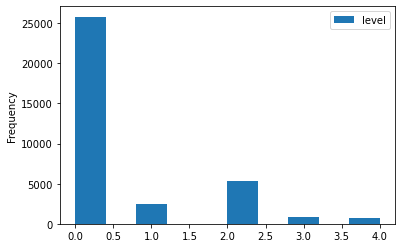

In [7]:
df_y[['level']].plot(kind='hist')


In [8]:
max_sample_amount = min([len(df_y[df_y['level'] == col]) for col in df_y['level'].unique()])
print(max_sample_amount)

708


In [9]:
len(list(df_y[df_y['level'] == 0]['image']))

25810

In [10]:
all_labels = []
random.seed(13122020)
for col in df_y['level'].unique():
    all_labels.extend(random.sample(list(df_y[df_y['level'] == col]['image']), max_sample_amount))
print(len(all_labels))

3540


In [11]:
all_filenames = [[],[]]
for filename in all_labels: 
    all_filenames[0].append(os.path.join('./train/', filename+'.jpeg'))
    all_filenames[1].append(os.path.join('./even-distribution/', filename+'.jpeg'))


In [12]:
start = time.time()

for str_idx in range(len(all_filenames[0])):
    print(str_idx)
    array_to_img(fix_image_array(img_to_array(load_img(all_filenames[0][str_idx])))).resize((128,128)).save(all_filenames[1][str_idx])

end = time.time()
print(np.abs(end - start))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
7710.555607318878


In [13]:
print('Eindelijk klaar met runnen')

Eindelijk klaar met runnen
